In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from operator import itemgetter

In [2]:
%matplotlib inline

## vid 14 0 bar plot example

## Read data

In [3]:
views = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col='date')
views

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
views.median()

value    57197.5
dtype: float64

In [5]:
views.value.quantile(0.5)

57197.5

In [6]:
views.value.mean().round(1)

67220.7

In [7]:
q_975 = views.value.quantile(0.975)
q_975

177613.075

In [8]:
q_025 = views.value.quantile(0.025)
q_025

17876.4

In [9]:
filt_outstanding = (views.value <= q_975) & (views.value >= q_025)

In [10]:
views_cleaned = views.loc[filt_outstanding, :].copy()
views_cleaned

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


## draw_line_plot


In [11]:
def draw_line_plot():
    # Draw line plot

    fig = plt.figure()
    
    # plot title
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # axes labels
    plt.xlabel('Date')
    plt.ylabel('Page Views')

    # data
    x = views_cleaned.index
    y = views_cleaned.value

    plt.plot(x, y)
    # plt.show()
    # plt.savefig('line_plot.png')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

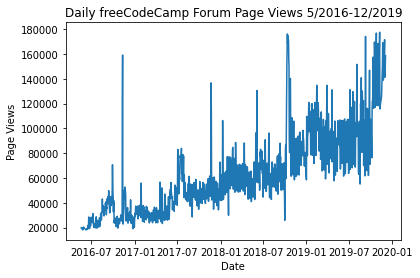

In [12]:
fi = draw_line_plot()

In [ ]:
fi?

In [ ]:
fi.axes?

In [ ]:
len(fi.axes)

In [ ]:
fi.axes[0]

In [ ]:
fi.axes[0].get_title()

## draw_bar_plot

In [ ]:
# show average daily page views for each month grouped by year
# legend should show month labels and have a title of "Months"
# On the chart, the label on the x axis should be "Years"
# and the label on the y axis should be "Average Page Views".

In [ ]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = views_cleaned.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    df_bar['month_index'] = df_bar.index.month
    month_gr = df_bar.groupby('month')
    months_indexes = month_gr.nth(0)
    months_indexes['combo'] = tuple(zip(months_indexes.index, months_indexes.month_index))
    month_tuples = list(months_indexes.combo)
    months_ordered = sorted(month_tuples, key=lambda x: x[1])
    months_ordered = [month for month, index in months_ordered]
    month_type = pd.api.types.CategoricalDtype(categories=months_ordered, ordered=True)
    df_bar['month'] = df_bar.month.astype(month_type)
    
    df_bar.drop(columns='month_index', inplace=True)
    df_bar_gr = df_bar.groupby(['year', 'month'])
    
    mean = df_bar_gr.mean().sort_index()
    mean.stack().unstack(level='month')
    
    x = mean.stack().unstack(level='month')
    
    # Draw bar plot
    fig = plt.figure()
    
    
#     plt.title()
#     plt.legend()
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    
    x.plot(kind='bar')
    
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

In [59]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
#     df_bar = df.copy()
    df_bar = views_cleaned.copy()

    # add year
    df_bar['year'] = df_bar.index.year
    df_bar.year.value_counts().sort_index()

    # add month name
    df_bar['month'] = df_bar.index.month_name()
    df_bar.month.value_counts(normalize=True).mul(100).round(1)

    # add month index
    df_bar['month_index'] = df_bar.index.month

    # get sorted months
    month_gr = df_bar.groupby('month')
    months_indexes = month_gr.nth(0)
    months_indexes['combo'] = tuple(zip(months_indexes.index, months_indexes.month_index))
    month_tuples = list(months_indexes.combo)
    months_ordered = sorted(month_tuples, key=lambda x: x[1])
    months_ordered = [month for month, index in months_ordered]
    # months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # define month as categorical data; Specify logical ordering of the category ---- ordered categories
    month_type = pd.api.types.CategoricalDtype(categories=months_ordered, ordered=True)
    df_bar['month'] = df_bar.month.astype(month_type)

    # data for bar plot
    df_bar.drop(columns='month_index', inplace=True)
    df_bar_gr = df_bar.groupby(['year', 'month'])
    mean = df_bar_gr.mean().sort_index()
    data_for_plot = mean.unstack()
    data_for_plot.columns = months_ordered

    # Draw bar plot
    fig = plt.figure()
#     plt.title('blabla')

    data_for_plot.plot(kind='bar')
    
    plt.show()

    
    # Save image and return fig (don't change this part)
    
    # fig.savefig('bar_plot.png')
    
    plt.savefig('bar_plot.png')
    
    return fig

<Figure size 432x288 with 0 Axes>

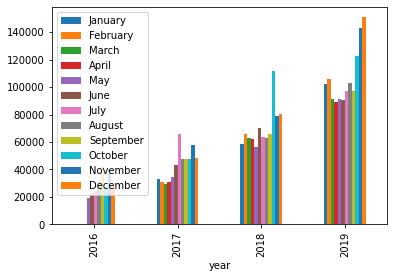

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [60]:
draw_bar_plot()

### Copy dataframe

In [22]:
vc = views_cleaned.copy()

In [23]:
vc.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


### Add year 

In [24]:
vc['year'] = vc.index.year

In [25]:
vc.year.value_counts().sort_index()

2016    205
2017    365
2018    362
2019    306
Name: year, dtype: int64

### Add month name

In [26]:
vc['month'] = vc.index.month_name()

In [27]:
vc.month.value_counts(normalize=True).mul(100).round(1)

August       9.9
July         9.7
September    9.7
October      9.0
June         8.6
November     8.4
May          7.9
December     7.7
January      7.5
March        7.5
April        7.3
February     6.8
Name: month, dtype: float64

In [28]:
vc.head()

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May


### Add month index

In [29]:
vc['month_index'] = vc.index.month

In [30]:
vc.head()

,value,year,month,month_index
date,,,,
2016-05-19,19736,2016,May,5
2016-05-26,18060,2016,May,5
2016-05-27,19997,2016,May,5
2016-05-28,19044,2016,May,5
2016-05-29,20325,2016,May,5


In [31]:
vc.dtypes

value           int64
year            int64
month          object
month_index     int64
dtype: object

### get sorted months

In [32]:
month_gr = vc.groupby('month')

In [33]:
months_indexes = month_gr.nth(0)
months_indexes

,value,year,month_index
month,,,
April,23762,2017,4
August,20947,2016,8
December,32666,2016,12
February,30124,2017,2
January,26185,2017,1
July,28372,2016,7
June,18335,2016,6
March,33258,2017,3
May,19736,2016,5


In [34]:
months_indexes['combo'] = tuple(zip(months_indexes.index, months_indexes.month_index))
months_indexes

,value,year,month_index,combo
month,,,,
April,23762,2017,4,"(April, 4)"
August,20947,2016,8,"(August, 8)"
December,32666,2016,12,"(December, 12)"
February,30124,2017,2,"(February, 2)"
January,26185,2017,1,"(January, 1)"
July,28372,2016,7,"(July, 7)"
June,18335,2016,6,"(June, 6)"
March,33258,2017,3,"(March, 3)"
May,19736,2016,5,"(May, 5)"


In [35]:
month_tuples = list(months_indexes.combo)
# list(month_tuples)
# month_tuples
month_tuples

[('April', 4),
 ('August', 8),
 ('December', 12),
 ('February', 2),
 ('January', 1),
 ('July', 7),
 ('June', 6),
 ('March', 3),
 ('May', 5),
 ('November', 11),
 ('October', 10),
 ('September', 9)]

In [36]:
months_ordered = sorted(month_tuples, key=lambda x: x[1])
months_ordered = [month for month, index in months_ordered]
# months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_ordered

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

# todo: define month as categorical data; Specify logical ordering of the category ---- ordered categories

In [37]:
month_type = pd.api.types.CategoricalDtype(categories=months_ordered, ordered=True)

In [38]:
vc['month'] = vc.month.astype(month_type)

In [39]:
vc.dtypes

value             int64
year              int64
month          category
month_index       int64
dtype: object

## data for bar plot

In [40]:
vc.drop(columns='month_index', inplace=True)
vc

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


In [41]:
vcg = vc.groupby(['year', 'month'])

In [42]:
vcg.mean().sort_index().head(10)

value
year month                  
2016 January             NaN
     February            NaN
     March               NaN
     April               NaN
     May        19432.400000
     June       21875.105263
     July       24109.678571
     August     31049.193548
     September  41476.866667
     October    27398.322581

<AxesSubplot:xlabel='year,month'>

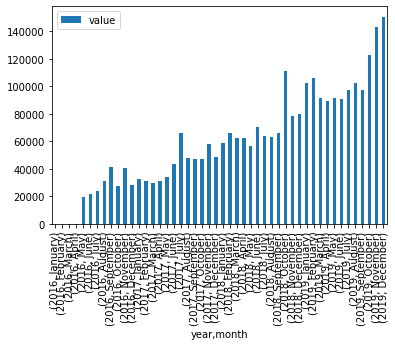

In [43]:
vcg.mean().sort_index().plot(kind='bar')

## rotate data to get year as index and months list as columns

In [44]:
mean = vcg.mean().sort_index()

In [45]:
mean.head(10)

value
year month                  
2016 January             NaN
     February            NaN
     March               NaN
     April               NaN
     May        19432.400000
     June       21875.105263
     July       24109.678571
     August     31049.193548
     September  41476.866667
     October    27398.322581

In [46]:
xx = mean.unstack()
xx

value                                                           \
month        January       February         March         April           May   
year                                                                            
2016             NaN            NaN           NaN           NaN  19432.400000   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

                                                                               \
month          June          July         August     September        October   
year                                                                            
2016   21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017   43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018   70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019   90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

                                     
month       November       December  
year                                 
2016    40448.633333   27832.419355  
2017    57701.566667   48420.580645  
2018    78688.333333   80047.483871  
2019   143166.428571  150733.500000

In [48]:
xx.index

Int64Index([2016, 2017, 2018, 2019], dtype='int64', name='year')

In [49]:
xx.columns

MultiIndex([('value',   'January'),
            ('value',  'February'),
            ('value',     'March'),
            ('value',     'April'),
            ('value',       'May'),
            ('value',      'June'),
            ('value',      'July'),
            ('value',    'August'),
            ('value', 'September'),
            ('value',   'October'),
            ('value',  'November'),
            ('value',  'December')],
           names=[None, 'month'])

In [50]:
xx.columns = months_ordered

In [53]:
xx

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


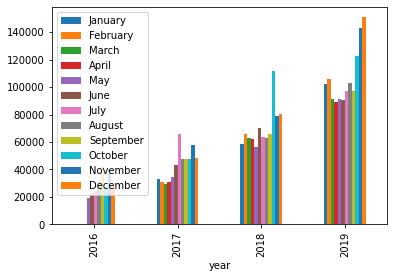

In [75]:
ax = xx.plot(kind='bar')

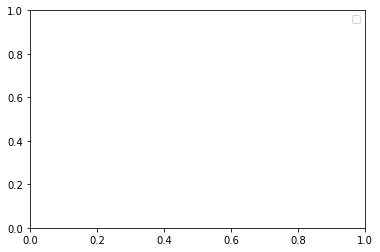

In [74]:
plt.legend('YearsZ')

In [77]:
ax

<AxesSubplot:xlabel='year'>

In [78]:
fig = ax.get_figure()

In [79]:
fig.savefig('hahaha.png', dpi=200, transparent=False)